In [ ]:
import os
import sys
import pandas as pd

data_folder = os.path.join('..', 'output')

data = pd.read_excel(os.path.join(data_folder, '1May30May25_td_report_all_articles.xlsx'))

headlines_kpis = data[['title', 'link', 'pubdate', 'category', 'diff_with_daily_benchmark_views', 'diff_with_daily_benchmark_active_users', 'active users', 'average engagement time per active user']]

headlines_kpis

,title,link,pubdate,category,diff_with_daily_benchmark_views,diff_with_daily_benchmark_active_users,active users,average engagement time per active user
0,I Film sul tema del lavoro da vedere,https://www.taxidrivers.it/175465/magazine-2/i...,2025-05-01 04:20:19+00:00,Speciali e Magazine,179.0,132.0,143.0,81.265734
1,‘n-Ego’: giocare con l’esistenza,https://www.taxidrivers.it/414271/review/in-sa...,2025-05-01 03:51:58+00:00,Recensioni / In Sala,21.0,12.0,23.0,27.000000
2,La forza del sorriso e del pensiero: il cinema...,https://www.taxidrivers.it/440819/magazine-2/l...,2025-05-01 04:00:50+00:00,Speciali e Magazine,50.0,36.0,47.0,43.212766
3,Festival I Corti sul Lettino. Intervista a Ign...,https://www.taxidrivers.it/441234/festival-di-...,2025-05-01 08:00:40+00:00,Festival di Cinema,7.0,3.0,14.0,64.785714
4,I nuovi film al cinema dal 1° maggio e quelli ...,https://www.taxidrivers.it/441322/magazine-2/i...,2025-05-01 08:30:01+00:00,Speciali e Magazine,6.0,5.0,16.0,30.500000
...,...,...,...,...,...,...,...,...
699,Cannes 2025: i film in concorso continuano a t...,https://www.taxidrivers.it/447708/latest-news/...,2025-05-30 03:03:35+00:00,News,-47.0,-35.0,3.0,7.333333
700,Nastri d'argento 2025 i candidati,https://www.taxidrivers.it/447717/festival-di-...,2025-05-30 04:01:34+00:00,Festival di Cinema,-49.0,-35.0,3.0,3.000000
701,Taormina Film Festival: Premio alla Carriera a...,https://www.taxidrivers.it/447737/latest-news/...,2025-05-30 08:36:51+00:00,News,NaN,NaN,NaN,NaN
702,'The Home': il trailer del nuovo film horror d...,https://www.taxidrivers.it/447740/latest-news/...,2025-05-30 09:36:57+00:00,Anticipazioni,-52.0,-37.0,1.0,5.000000


## "Si farà" category

In [53]:
import re

def contains_si_fara(title: str) -> bool:
    """
    Checks if the title contains the phrase 'si fara' (case-insensitive).
    """
    # \b ensures word boundaries to avoid partial matches
    pattern = r'\bsi farà\b'
    return re.search(pattern, title, re.IGNORECASE) is not None

# Example usage:
titles = [
    "Il film si fara, confermato dal regista",
    "Non si fara mai questo progetto",
    "Speriamo che si fara presto",
    "Farà freddo domani"
]

# for t in titles:
#     result = contains_si_fara(t)
#     print(f"'{t}' → {'✅ Yes' if result else '❌ No'}")

headlines_kpis["si farà"] = headlines_kpis["title"].apply(contains_si_fara)
# headlines_kpis["title"].to_csv("headlines_kpis.csv", index=False)

print(f"Total headlines containing 'si fara': {headlines_kpis['si farà'].sum()}")


Total headlines containing 'si fara': 19


C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_1836\3488337316.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  headlines_kpis["si farà"] = headlines_kpis["title"].apply(contains_si_fara)


In [54]:
# Capacità di attrarre lettori di articoli con si farà

si_fara_diff_with_benchmark_active_users_mean = headlines_kpis[headlines_kpis["si farà"]]['diff_with_daily_benchmark_active_users'].mean()
non_si_fara_diff_with_benchmark_active_users_mean = headlines_kpis[~headlines_kpis["si farà"]]['diff_with_daily_benchmark_active_users'].mean()
print(f"Average difference with daily benchmark active users for 'si farà': {si_fara_diff_with_benchmark_active_users_mean}")
print(f"Average difference with daily benchmark active users for 'non si farà': {non_si_fara_diff_with_benchmark_active_users_mean}")

Average difference with daily benchmark active users for 'si farà': 18.166666666666668
Average difference with daily benchmark active users for 'non si farà': 4.316


In [ ]:
si_fara_active_users_mean = headlines_kpis[headlines_kpis["si farà"]]['active users'].mean()
non_si_fara_active_users_mean = headlines_kpis[~headlines_kpis["si farà"]]['active users'].mean()
print(f"Average active users for 'si farà': {si_fara_active_users_mean}")
print(f"Average active users for 'non si farà': {non_si_fara_active_users_mean}") 

Average active users for 'si farà': 30.166666666666668
Average active users for 'non si farà': 17.3104


In [72]:
# The same for median
si_fara_active_users_median = headlines_kpis[headlines_kpis["si farà"]]['active users'].median()
non_si_fara_active_users_median = headlines_kpis[~headlines_kpis["si farà"]]['active users'].median()

print(f"Median active users for 'si farà': {si_fara_active_users_median}")
print(f"Median active users for 'non si farà': {non_si_fara_active_users_median}")

# Capacità di attrarre lettori di articoli con si farà e engagement time



Median active users for 'si farà': 11.5
Median active users for 'non si farà': 12.0


In [58]:
# Take only articles containing 'si farà' and write to a new file
si_fara_articles = headlines_kpis[headlines_kpis["si farà"]]
si_fara_articles_file = os.path.join(data_folder, 'si_fara_articles.xlsx')
si_fara_articles.to_excel(si_fara_articles_file, index=False)

In [59]:
# Use si fara articles to sort by active users and provide my a nice way to visualize the results

## 🧑‍🔬Headlines A/B tests

In [60]:
# How would you decide on which user sees the red button and who sees the blue one?

# How many clicks are needed before you make a decision on which button is better? 10 clicks per group? One hundred? Or perhaps a thousand?

# If an A/B test isn’t set up properly, your results will not be accurate, and you might end up making a decision that costs you (or the company) hundreds of thousands of dollars in sales.

Sample Size and Duration for Different MDEs:
      MDE Traffic Allocation Sample Size per Variant  Duration (days)
0    1.0%                10%               2,986,813            17921
1    1.0%                50%               2,986,813             3585
2    1.0%               100%               2,986,813             1793
3    2.0%                10%                 747,760             4487
4    2.0%                50%                 747,760              898
5    2.0%               100%                 747,760              449
6    3.0%                10%                 332,807             1997
7    3.0%                50%                 332,807              400
8    3.0%               100%                 332,807              200
9    5.0%                10%                 120,146              721
10   5.0%                50%                 120,146              145
11   5.0%               100%                 120,146               73
12  10.0%                10%                 

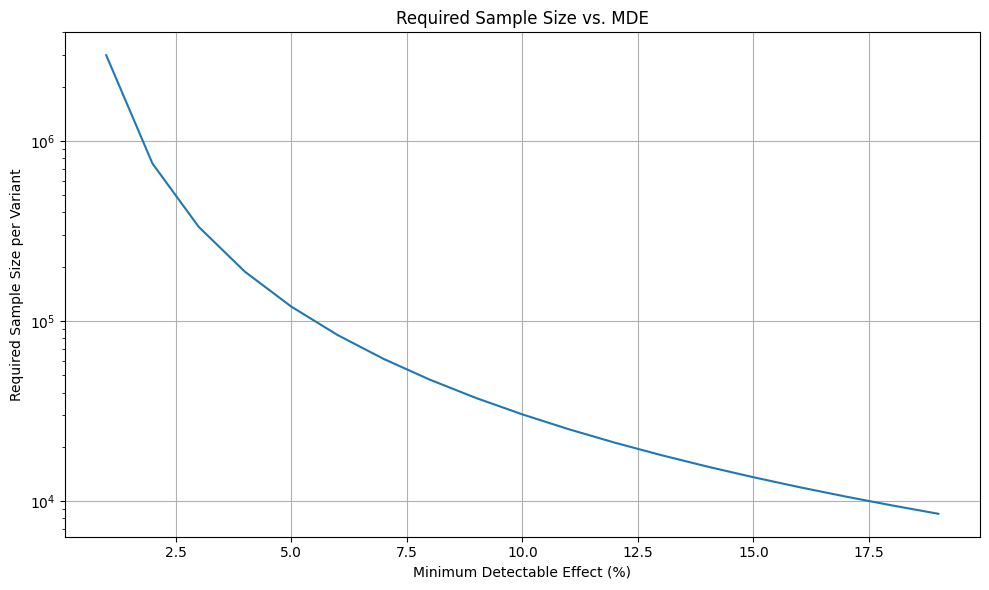

In [61]:
# Ipotesi: # Se un titolo contiene "si farà", allora è più probabile che attragga un maggior numero di lettori rispetto a un titolo che non lo contiene.
# H0: Non c'è differenza significativa nel numero di lettori tra i titoli che contengono "si farà" e quelli che non lo contengono.
# H1: C'è una differenza significativa nel numero di lettori tra i titoli che contengono "si farà" e quelli che non lo contengono.

# Metrica di successo: Numero di lettori (active users) per titolo.

# Quante osservazioni sono necessarie per raggiungere una potenza statistica del 80% e un livello di significatività del 5%?
# Minimum detectable effect (MDE): La differenza minima che si desidera rilevare tra i due gruppi (ad esempio, una differenza del 10% nel numero di lettori).

# Più a lungo il test viene eseguito, più dati si raccolgono e più è probabile che si raggiunga una conclusione affidabile. 
# La dimensione del campione necessaria dipende da vari fattori, e come regola generale si identifica il Minimum Detectable Effect (MDE), ovvero la differenza minima che si desidera rilevare tra i due gruppi.
# In particolare, se si desidera rilevare una differenza del 10% nel numero di lettori tra i due gruppi, sarà necessario un campione minimo di circa 1000 osservazioni per gruppo (2000 in totale) per raggiungere una potenza statistica del 80% e un livello di significatività del 5% [*Vero?]
# Se il MDE è più grande, ad esempio del 20%, il campione minimo necessario sarà inferiore, intorno a 500 osservazioni per gruppo (1000 in totale), con la stessa potenza e livello di significatività.
# Se invece decidessimo di sacrificare un po' di potenza statistica e accettare una potenza del 70%, il campione minimo necessario per rilevare una differenza del 10% sarebbe di circa 800 osservazioni per gruppo (1600 in totale), mentre per una differenza del 20% sarebbe di circa 400 osservazioni per gruppo (800 in totale).
# Se dovessimo spiegarlo con un'idea concreta, immagina di voler misurare il grado di umidità nell'aria, e capire se questa spiega la crescita delle piante. In questo caso, il MDE sarebbe il tasso di crescita minimo che si desidera osservare tra le piante in condizioni di umidità diversa. 


import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

def calculate_sample_size(baseline_conversion, mde, power=0.8, significance_level=0.05):
   expected_conversion = baseline_conversion * (1 + mde)
  
   z_alpha = stats.norm.ppf(1 - significance_level/2)
   z_beta = stats.norm.ppf(power)
  
   sd1 = np.sqrt(baseline_conversion * (1 - baseline_conversion))
   sd2 = np.sqrt(expected_conversion * (1 - expected_conversion))
  
   numerator = (z_alpha * np.sqrt(2 * sd1**2) + z_beta * np.sqrt(sd1**2 + sd2**2))**2
   denominator = (expected_conversion - baseline_conversion)**2
  
   sample_size_per_variant = np.ceil(numerator / denominator)
  
   return int(sample_size_per_variant)

def calculate_experiment_duration(sample_size_per_variant, daily_visitors, traffic_allocation=0.5):
   visitors_per_variant_per_day = daily_visitors * traffic_allocation / 2
   days_required = np.ceil(sample_size_per_variant / visitors_per_variant_per_day)
  
   return int(days_required)

# The first function calculates how many users you need for the experiment.
# The second function then takes the output of the first function and uses it to calculate the experiment duration, 
# given the number of daily users available (in this case, the daily traffic to Jean’s website).

# Now, we can create a data frame that gives us a range of sample sizes for different MDEs:

# Example MDE/sample size tradeoff for Jean's website
daily_visitors = 100000 / 30  # Convert monthly to daily visitors
baseline_conversion = 0.05    # Jean's current landing page CTR (baseline conv rate of 5%)

# Create a table of sample sizes for different MDEs
mde_values = [0.01, 0.02, 0.03, 0.05, 0.10, 0.15]  # 1% to 15% change
traffic_allocations = [0.1, 0.5, 1.0]  # 10%, 50%, and 100% of website traffic

results = []
for mde in mde_values:
   sample_size = calculate_sample_size(baseline_conversion, mde)
  
   for allocation in traffic_allocations:
       duration = calculate_experiment_duration(sample_size, daily_visitors, allocation)
       results.append({
           'MDE': f"{mde*100:.1f}%",
           'Traffic Allocation': f"{allocation*100:.0f}%",
           'Sample Size per Variant': f"{sample_size:,}",
           'Duration (days)': duration
       })

# Create a DataFrame and display the results
df_results = pd.DataFrame(results)
print("Sample Size and Duration for Different MDEs:")
print(df_results)


# Visualize the relationship between MDE and sample size
plt.figure(figsize=(10, 6))
mde_range = np.arange(0.01, 0.2, 0.01)
sample_sizes = [calculate_sample_size(baseline_conversion, mde) for mde in mde_range]

plt.plot(mde_range * 100, sample_sizes)
plt.xlabel('Minimum Detectable Effect (%)')
plt.ylabel('Required Sample Size per Variant')
plt.title('Required Sample Size vs. MDE')
plt.grid(True)
plt.yscale('log')
plt.tight_layout()
plt.savefig('sample_size_vs_mde.png')
plt.show()

# Charts like this are useful when presenting your results to business stakeholders. 
# This can help business teams easily make a decision as to which MDE/sample size tradeoff is acceptable when running an experiment.

In [62]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

def analyze_ab_test_results(control_visitors, control_conversions,
                          treatment_visitors, treatment_conversions,
                          significance_level=0.05):

   # Calculate conversion rates
   control_rate = control_conversions / control_visitors
   treatment_rate = treatment_conversions / treatment_visitors
  
   # Calculate absolute and relative differences
   absolute_diff = treatment_rate - control_rate
   relative_diff = absolute_diff / control_rate
  
   # Calculate standard errors
   control_se = np.sqrt(control_rate * (1 - control_rate) / control_visitors)
   treatment_se = np.sqrt(treatment_rate * (1 - treatment_rate) / treatment_visitors)
  
   # Calculate z-score
   pooled_se = np.sqrt(control_se**2 + treatment_se**2)
   z_score = absolute_diff / pooled_se
  
   # Calculate p-value (two-tailed test)
   p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
  
   # Calculate confidence interval
   z_critical = stats.norm.ppf(1 - significance_level/2)
   margin_of_error = z_critical * pooled_se
   ci_lower = absolute_diff - margin_of_error
   ci_upper = absolute_diff + margin_of_error
  
   # Determine if result is statistically significant
   is_significant = p_value < significance_level
  
   return {
       'control_rate': control_rate,
       'treatment_rate': treatment_rate,
       'absolute_diff': absolute_diff,
       'relative_diff': relative_diff * 100,  # Convert to percentage
       'z_score': z_score,
       'p_value': p_value,
       'ci_lower': ci_lower,
       'ci_upper': ci_upper,
       'is_significant': is_significant
   }


# 

In [63]:
# headlines_tags = ["si farà", "tutto su"] # Terminare di definire

# Fai A/B testing su headline che contengono "si farà" 

# https://www.kdnuggets.com/a-complete-guide-to-a-b-testing-in-python



## Null values exploration

In [64]:
# Print links of rows with null values
null_links = headlines_kpis[headlines_kpis.isnull().any(axis=1)]['link']
print(null_links)

7      https://www.taxidrivers.it/272258/live-streami...
11     https://www.taxidrivers.it/441191/interviews/s...
29     https://www.taxidrivers.it/438271/festival-di-...
32     https://www.taxidrivers.it/440971/festival-di-...
34     https://www.taxidrivers.it/441515/trailers/the...
                             ...                        
585    https://www.taxidrivers.it/446783/festival-di-...
609    https://www.taxidrivers.it/445783/interviews/r...
696    https://www.taxidrivers.it/447674/trailers/goo...
701    https://www.taxidrivers.it/447737/latest-news/...
703    https://www.taxidrivers.it/447743/trailers/hon...
Name: link, Length: 61, dtype: object


In [65]:
# Compute the percentage of null values for each category in the 'category' column of headlines_kpis

# Count total rows per category
category_counts = headlines_kpis['category'].value_counts(dropna=False)

# Count nulls per category
nulls_per_category = headlines_kpis[headlines_kpis.isnull().any(axis=1)]['category'].value_counts(dropna=False)

# Compute percentage of nulls per category
null_percentage_per_category = (nulls_per_category / category_counts * 100).fillna(0)

# Display as DataFrame for clarity
null_percentage_per_category_df = null_percentage_per_category.reset_index()
null_percentage_per_category_df.columns = ['category', 'null_percentage']

null_percentage_per_category_df

,category,null_percentage
0,Altro,0.000000
1,Anticipazioni,4.301075
2,Approfondimento,0.000000
3,Festival di Cinema,5.645161
4,Guide e Film da Vedere,0.000000
5,Interviste,25.925926
6,News,10.526316
7,Recensioni,0.980392
8,Recensioni / In Sala,0.000000
9,Rubriche,0.000000


In [66]:
category_counts

category
News                      190
Festival di Cinema        124
Recensioni                102
Anticipazioni              93
Speciali e Magazine        50
Trailers                   50
Recensioni / In Sala       29
Interviste                 27
Altro                      19
Serie TV                   12
Rubriche                    5
Approfondimento             2
Guide e Film da Vedere      1
Name: count, dtype: int64

In [67]:
headlines_kpis[headlines_kpis['category'] == 'Speciali e Magazine']

,title,link,pubdate,category,diff_with_daily_benchmark_views,diff_with_daily_benchmark_active_users,active users,average engagement time per active user,si farà
0,I Film sul tema del lavoro da vedere,https://www.taxidrivers.it/175465/magazine-2/i...,2025-05-01 04:20:19+00:00,Speciali e Magazine,179.0,132.0,143.0,81.265734,False
2,La forza del sorriso e del pensiero: il cinema...,https://www.taxidrivers.it/440819/magazine-2/l...,2025-05-01 04:00:50+00:00,Speciali e Magazine,50.0,36.0,47.0,43.212766,False
4,I nuovi film al cinema dal 1° maggio e quelli ...,https://www.taxidrivers.it/441322/magazine-2/i...,2025-05-01 08:30:01+00:00,Speciali e Magazine,6.0,5.0,16.0,30.500000,False
28,Florence Pugh - non solo un' eroina Marvel,https://www.taxidrivers.it/422492/magazine-2/p...,2025-05-02 04:00:37+00:00,Speciali e Magazine,1.0,0.0,13.0,30.923077,False
33,1485 KHz (Se otto ore) - La frequenza dell'orrore,https://www.taxidrivers.it/441481/taxidrivers-...,2025-05-01 19:00:15+00:00,Speciali e Magazine,0.0,-2.0,9.0,37.444444,False
52,Scrittori alla regia: il cinema - come la vita...,https://www.taxidrivers.it/441543/magazine-2/s...,2025-05-03 04:00:23+00:00,Speciali e Magazine,5.0,4.0,16.0,89.375000,False
53,'The Gilded Age' 3: ecco il teaser della nuova...,https://www.taxidrivers.it/441567/taxidrivers-...,2025-05-02 18:04:14+00:00,Speciali e Magazine,42.0,41.0,54.0,26.518519,False
62,"Cosa guardare questo maggio: finali esplosivi,...",https://www.taxidrivers.it/441816/magazine-2/c...,2025-05-03 11:37:28+00:00,Speciali e Magazine,4.0,0.0,12.0,12.416667,False
71,La famiglia Simpson e tutti i personaggi più f...,https://www.taxidrivers.it/441374/magazine-2/f...,2025-05-04 04:00:54+00:00,Speciali e Magazine,NaN,NaN,NaN,NaN,False
89,Tilda Swinton: una filmografia da Oscar da ved...,https://www.taxidrivers.it/440988/magazine-2/p...,2025-05-05 04:30:36+00:00,Speciali e Magazine,-4.5,-2.0,16.0,39.562500,False
